### Movie Recommendation System

In [1]:
!wget https://www.dropbox.com/s/zpjqx685em4hllf/ratings.csv

--2021-04-20 04:24:48--  https://www.dropbox.com/s/zpjqx685em4hllf/ratings.csv
Resolving www.dropbox.com (www.dropbox.com)... 162.125.1.18, 2620:100:601a:18::a27d:712
Connecting to www.dropbox.com (www.dropbox.com)|162.125.1.18|:443... connected.
HTTP request sent, awaiting response... 301 Moved Permanently
Location: /s/raw/zpjqx685em4hllf/ratings.csv [following]
--2021-04-20 04:24:49--  https://www.dropbox.com/s/raw/zpjqx685em4hllf/ratings.csv
Reusing existing connection to www.dropbox.com:443.
HTTP request sent, awaiting response... 302 Found
Location: https://uc65cbdcf6ab438903b2805cc9d1.dl.dropboxusercontent.com/cd/0/inline/BM8zcQUBcgQDkgGPUtsrBjUZsl8D_M5PFL8r3BgHzYXuHRfij-KhQe3SmqSdKU2NHKoSbtC2UPWCFqmeuN8qCuzGuNRvt9VQVr9-sSyyhw4k-CXX9WDLrnj4EPV2VyZNLT0wr5ej2hXv60zjUz4wzM9G/file# [following]
--2021-04-20 04:24:49--  https://uc65cbdcf6ab438903b2805cc9d1.dl.dropboxusercontent.com/cd/0/inline/BM8zcQUBcgQDkgGPUtsrBjUZsl8D_M5PFL8r3BgHzYXuHRfij-KhQe3SmqSdKU2NHKoSbtC2UPWCFqmeuN8qCuzGuNRvt

In [2]:
import pandas as pd
rating_details = pd.read_csv('ratings.csv')
rating_details.head()


,userId,movieId,rating,timestamp
0,1,1,4.0,964982703
1,1,3,4.0,964981247
2,1,6,4.0,964982224
3,1,47,5.0,964983815
4,1,50,5.0,964982931


In [4]:
!wget https://www.dropbox.com/s/9vk3xh99pt5f27l/movies.csv

--2021-04-20 04:28:35--  https://www.dropbox.com/s/9vk3xh99pt5f27l/movies.csv
Resolving www.dropbox.com (www.dropbox.com)... 162.125.1.18, 2620:100:601a:18::a27d:712
Connecting to www.dropbox.com (www.dropbox.com)|162.125.1.18|:443... connected.
HTTP request sent, awaiting response... 301 Moved Permanently
Location: /s/raw/9vk3xh99pt5f27l/movies.csv [following]
--2021-04-20 04:28:36--  https://www.dropbox.com/s/raw/9vk3xh99pt5f27l/movies.csv
Reusing existing connection to www.dropbox.com:443.
HTTP request sent, awaiting response... 302 Found
Location: https://uc8a3425238bf6e7001d6c4ed2e7.dl.dropboxusercontent.com/cd/0/inline/BM986avdaUT9mCzk8mzgqFpIz2TtVX0__lvul-Emj4FQkJWyXItOFsyvWBfpGm7PtWpqb-6oXRMxRudjnatATTkq8yd_gVJu3eMkHmVN1Hl-vBdBCTPcTzJsRcxlYDYxxtXLsKzHOGVFpDut8g-N5gso/file# [following]
--2021-04-20 04:28:36--  https://uc8a3425238bf6e7001d6c4ed2e7.dl.dropboxusercontent.com/cd/0/inline/BM986avdaUT9mCzk8mzgqFpIz2TtVX0__lvul-Emj4FQkJWyXItOFsyvWBfpGm7PtWpqb-6oXRMxRudjnatATTkq8yd_gVJu

In [5]:
movie_details = pd.read_csv('movies.csv')

movie_details.head()

,movieId,title,genres
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
1,2,Jumanji (1995),Adventure|Children|Fantasy
2,3,Grumpier Old Men (1995),Comedy|Romance
3,4,Waiting to Exhale (1995),Comedy|Drama|Romance
4,5,Father of the Bride Part II (1995),Comedy


In [6]:
rating_details.shape

(100836, 4)

In [7]:
movie_details.shape

(9742, 3)

In [8]:
dataset = pd.merge(rating_details,movie_details, on='movieId')

dataset.tail()

,userId,movieId,rating,timestamp,title,genres
100831,610,160341,2.5,1479545749,Bloodmoon (1997),Action|Thriller
100832,610,160527,4.5,1479544998,Sympathy for the Underdog (1971),Action|Crime|Drama
100833,610,160836,3.0,1493844794,Hazard (2005),Action|Drama|Thriller
100834,610,163937,3.5,1493848789,Blair Witch (2016),Horror|Thriller
100835,610,163981,3.5,1493850155,31 (2016),Horror


In [9]:
dataset.shape

(100836, 6)

In [10]:
import datetime
from datetime import datetime, date
dataset['datetime'] = pd.to_datetime(dataset['timestamp'])

In [11]:
dataset.shape

(100836, 7)

In [12]:
dataset.nunique()

userId         610
movieId       9724
rating          10
timestamp    85043
title         9719
genres         951
datetime     85043
dtype: int64

In [13]:
dataset.describe()

,userId,movieId,rating,timestamp
count,100836.000000,100836.000000,100836.000000,1.008360e+05
mean,326.127564,19435.295718,3.501557,1.205946e+09
std,182.618491,35530.987199,1.042529,2.162610e+08
min,1.000000,1.000000,0.500000,8.281246e+08
25%,177.000000,1199.000000,3.000000,1.019124e+09
50%,325.000000,2991.000000,3.500000,1.186087e+09
75%,477.000000,8122.000000,4.000000,1.435994e+09
max,610.000000,193609.000000,5.000000,1.537799e+09


Average Rating

In [14]:
a = dataset
a = a.groupby('title')['rating'].mean()
a

title
'71 (2014)                                   4.000000
'Hellboy': The Seeds of Creation (2004)      4.000000
'Round Midnight (1986)                       3.500000
'Salem's Lot (2004)                          5.000000
'Til There Was You (1997)                    4.000000
                                               ...   
eXistenZ (1999)                              3.863636
xXx (2002)                                   2.770833
xXx: State of the Union (2005)               2.000000
¡Three Amigos! (1986)                        3.134615
À nous la liberté (Freedom for Us) (1931)    1.000000
Name: rating, Length: 9719, dtype: float64

In [15]:
sorted_ratings_wise_movie = a.sort_values(ascending=False)

In [16]:
sorted_ratings_wise_movie

title
Karlson Returns (1970)                           5.0
Winter in Prostokvashino (1984)                  5.0
My Love (2006)                                   5.0
Sorority House Massacre II (1990)                5.0
Winnie the Pooh and the Day of Concern (1972)    5.0
                                                ... 
The Beast of Hollow Mountain (1956)              0.5
Follow Me, Boys! (1966)                          0.5
The Butterfly Effect 3: Revelations (2009)       0.5
The Emoji Movie (2017)                           0.5
Rust and Bone (De rouille et d'os) (2012)        0.5
Name: rating, Length: 9719, dtype: float64

## Total number of ratings for a particular movie

In [17]:
b = dataset.groupby('title')['rating'].count()

In [18]:
b.tail()

title
eXistenZ (1999)                              22
xXx (2002)                                   24
xXx: State of the Union (2005)                5
¡Three Amigos! (1986)                        26
À nous la liberté (Freedom for Us) (1931)     1
Name: rating, dtype: int64

In [19]:
new_record = pd.DataFrame()

new_record['Average ratings'] = a

In [20]:
new_record['Count of Total Ratings'] = b

In [21]:
new_record.head()

,Average ratings,Count of Total Ratings
title,,
'71 (2014),4.0,1
'Hellboy': The Seeds of Creation (2004),4.0,1
'Round Midnight (1986),3.5,2
'Salem's Lot (2004),5.0,1
'Til There Was You (1997),4.0,2


In [22]:
import matplotlib.pyplot as plt
import seaborn as sns

sns.set_style('white')
%matplotlib inline

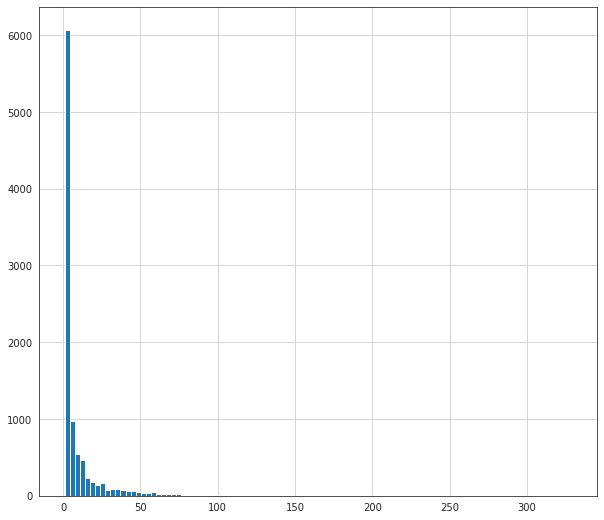

In [23]:
plt.figure(figsize=(10,9))

new_record['Count of Total Ratings'].hist(bins = 100)

From the output, we can see that most of the movies have received less than 50 ratings. While the number of movies having more than 100 ratings is very low.

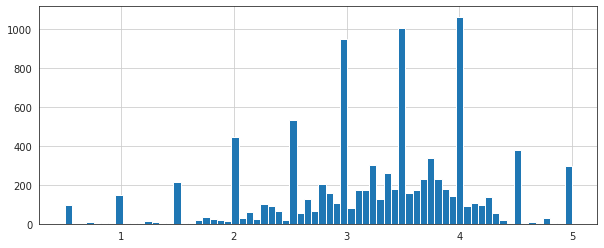

In [24]:
plt.figure(figsize=(10,4))

new_record['Average ratings'].hist(bins=70)

<Figure size 576x288 with 0 Axes>

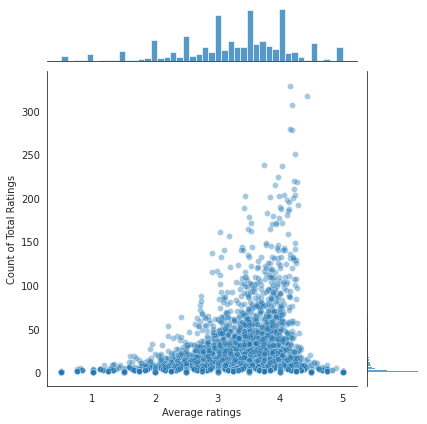

In [25]:
plt.figure(figsize=(8,4))
sns.jointplot(x = "Average ratings", y='Count of Total Ratings', data = new_record, alpha = 0.4)

In [26]:
moviematrix = dataset.pivot_table(index="userId", columns = 'title', values = 'rating')

In [27]:
moviematrix.head()

title,'71 (2014),'Hellboy': The Seeds of Creation (2004),'Round Midnight (1986),'Salem's Lot (2004),'Til There Was You (1997),'Tis the Season for Love (2015),"'burbs, The (1989)",'night Mother (1986),(500) Days of Summer (2009),*batteries not included (1987),...All the Marbles (1981),...And Justice for All (1979),00 Schneider - Jagd auf Nihil Baxter (1994),1-900 (06) (1994),10 (1979),10 Cent Pistol (2015),10 Cloverfield Lane (2016),10 Items or Less (2006),10 Things I Hate About You (1999),10 Years (2011),"10,000 BC (2008)",100 Girls (2000),100 Streets (2016),101 Dalmatians (1996),101 Dalmatians (One Hundred and One Dalmatians) (1961),101 Dalmatians II: Patch's London Adventure (2003),101 Reykjavik (101 Reykjavík) (2000),102 Dalmatians (2000),10th & Wolf (2006),"10th Kingdom, The (2000)","10th Victim, The (La decima vittima) (1965)","11'09""01 - September 11 (2002)",11:14 (2003),"11th Hour, The (2007)",12 Angry Men (1957),12 Angry Men (1997),12 Chairs (1971),12 Chairs (1976),12 Rounds (2009),12 Years a Slave (2013),...,Zathura (2005),Zatoichi and the Chest of Gold (Zatôichi senryô-kubi) (Zatôichi 6) (1964),Zazie dans le métro (1960),Zebraman (2004),"Zed & Two Noughts, A (1985)",Zeitgeist: Addendum (2008),Zeitgeist: Moving Forward (2011),Zeitgeist: The Movie (2007),Zelary (2003),Zelig (1983),Zero Dark Thirty (2012),Zero Effect (1998),"Zero Theorem, The (2013)",Zero de conduite (Zero for Conduct) (Zéro de conduite: Jeunes diables au collège) (1933),Zeus and Roxanne (1997),Zipper (2015),Zodiac (2007),Zombeavers (2014),Zombie (a.k.a. Zombie 2: The Dead Are Among Us) (Zombi 2) (1979),Zombie Strippers! (2008),Zombieland (2009),Zone 39 (1997),"Zone, The (La Zona) (2007)",Zookeeper (2011),Zoolander (2001),Zoolander 2 (2016),Zoom (2006),Zoom (2015),Zootopia (2016),Zulu (1964),Zulu (2013),[REC] (2007),[REC]² (2009),[REC]³ 3 Génesis (2012),anohana: The Flower We Saw That Day - The Movie (2013),eXistenZ (1999),xXx (2002),xXx: State of the Union (2005),¡Three Amigos! (1986),À nous la liberté (Freedom for Us) (1931)
userId,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4.0,NaN
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5.0,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [28]:
moviematrix.columns

Index([''71 (2014)', ''Hellboy': The Seeds of Creation (2004)',
       ''Round Midnight (1986)', ''Salem's Lot (2004)',
       ''Til There Was You (1997)', ''Tis the Season for Love (2015)',
       ''burbs, The (1989)', ''night Mother (1986)',
       '(500) Days of Summer (2009)', '*batteries not included (1987)',
       ...
       'Zulu (2013)', '[REC] (2007)', '[REC]² (2009)',
       '[REC]³ 3 Génesis (2012)',
       'anohana: The Flower We Saw That Day - The Movie (2013)',
       'eXistenZ (1999)', 'xXx (2002)', 'xXx: State of the Union (2005)',
       '¡Three Amigos! (1986)', 'À nous la liberté (Freedom for Us) (1931)'],
      dtype='object', name='title', length=9719)

In [30]:
xxx_2002_ratings = moviematrix['xXx (2002)']

In [31]:
xxx_2002_ratings.tail()

userId
606    NaN
607    NaN
608    3.5
609    NaN
610    2.0
Name: xXx (2002), dtype: float64

## Find the similarity with other movies like xXx(2002)

In [33]:
movie_similar_to_xXx2002 = moviematrix.corrwith(xxx_2002_ratings)


/usr/local/lib/python3.7/dist-packages/numpy/lib/function_base.py:2551: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar)
/usr/local/lib/python3.7/dist-packages/numpy/lib/function_base.py:2480: RuntimeWarning: divide by zero encountered in true_divide
  c *= np.true_divide(1, fact)


In [34]:
movie_similar_to_xXx2002

title
'71 (2014)                                        NaN
'Hellboy': The Seeds of Creation (2004)           NaN
'Round Midnight (1986)                            NaN
'Salem's Lot (2004)                               NaN
'Til There Was You (1997)                         NaN
                                               ...   
eXistenZ (1999)                              0.762493
xXx (2002)                                   1.000000
xXx: State of the Union (2005)               0.943880
¡Three Amigos! (1986)                        0.500000
À nous la liberté (Freedom for Us) (1931)         NaN
Length: 9719, dtype: float64

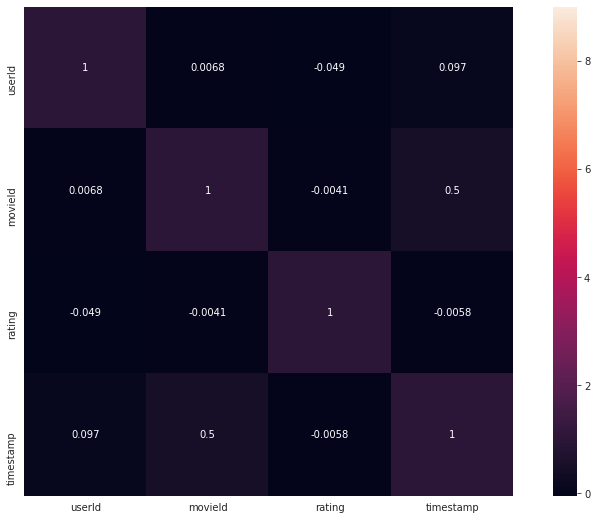

In [37]:
import matplotlib.pyplot as plt

correlation_metrics = dataset.corr()
fig = plt.figure(figsize=(14,9))
sns.heatmap(correlation_metrics, annot = True, vmax = 9, square = True)
plt.show()



In [38]:
xxx_2002_corr = pd.DataFrame(movie_similar_to_xXx2002, columns=['Correlation'])
xxx_2002_corr.dropna(inplace= True)
xxx_2002_corr.head()

,Correlation
title,
(500) Days of Summer (2009),0.831858
10 Cloverfield Lane (2016),0.802955
10 Items or Less (2006),1.000000
10 Things I Hate About You (1999),0.540062
"10,000 BC (2008)",0.177325
